<a href="https://colab.research.google.com/github/ArturBondarenko2004/-Artificial-intelligence-systems/blob/main/LR_8_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1000: Loss=2.9135, k=1.5128, b=1.4410
Epoch 2000: Loss=4.0861, k=1.6662, b=1.3564
Epoch 3000: Loss=3.4294, k=1.7156, b=1.3495
Epoch 4000: Loss=2.9558, k=1.6784, b=1.3550
Epoch 5000: Loss=4.0940, k=1.6410, b=1.3770
Epoch 6000: Loss=4.1837, k=1.6770, b=1.3631
Epoch 7000: Loss=3.8920, k=1.6564, b=1.3662
Epoch 8000: Loss=3.4565, k=1.7110, b=1.3558
Epoch 9000: Loss=4.2998, k=1.7114, b=1.3500
Epoch 10000: Loss=3.6722, k=1.7081, b=1.3399
Epoch 11000: Loss=4.1471, k=1.6605, b=1.3793
Epoch 12000: Loss=3.9804, k=1.7041, b=1.3371
Epoch 13000: Loss=3.6825, k=1.6727, b=1.3543
Epoch 14000: Loss=3.5979, k=1.7379, b=1.3364
Epoch 15000: Loss=3.1446, k=1.7003, b=1.3299
Epoch 16000: Loss=3.8188, k=1.7080, b=1.3244
Epoch 17000: Loss=5.2164, k=1.6989, b=1.3453
Epoch 18000: Loss=3.3307, k=1.6893, b=1.3679
Epoch 19000: Loss=4.3900, k=1.6774, b=1.3288
Epoch 20000: Loss=4.5945, k=1.6822, b=1.3330
Final parameters: k=1.6822, b=1.3330


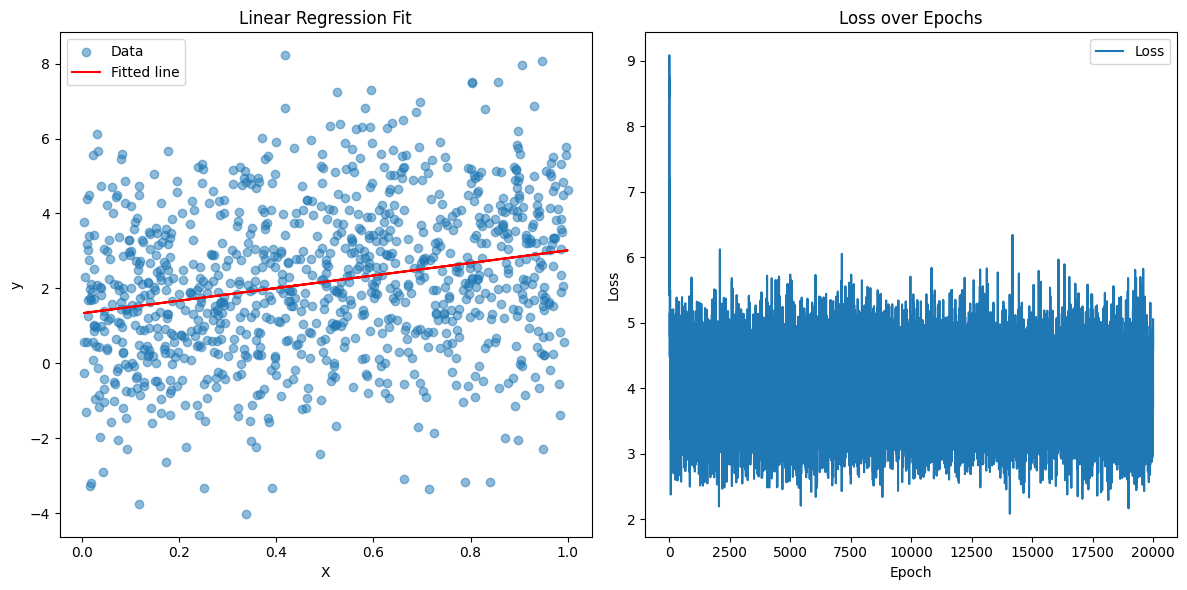

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1) Створюємо випадкові вхідні дані X_data та y_data:
#    • Генеруємо 1000 випадкових точок X рівномірно на [0; 1].
#    • Для кожної точки x обчислюємо y за формулою y = 2x + 1 + шум.
#    • Шум (ϵ) розподілено за нормальним законом N(0, 2).
np.random.seed(42)
X_data = np.random.rand(1000, 1).astype(np.float32)
noise = np.random.normal(0, 2, size=(1000, 1)).astype(np.float32)
y_data = 2 * X_data + 1 + noise

# 2) Ініціалізуємо змінні TensorFlow k та b:
#    • k ініціалізується випадковим числом із стандартного нормального розподілу.
#    • b ініціалізується як нуль.
k = tf.Variable(tf.random.normal([1]), name='k')
b = tf.Variable(tf.zeros([1]), name='b')

# 3) Параметри навчання:
#    • learning_rate - швидкість навчання для стохастичного градієнтного спуску.
#    • epochs - кількість ітерацій тренувального циклу.
#    • batch_size - кількість даних у міні-батчі.
learning_rate = 0.01
epochs = 20000
batch_size = 100

# 4) Оптимізатор:
#    • Використовуємо SGD (стохастичний градієнтний спуск) для оновлення ваг (k, b).
optimizer = tf.optimizers.SGD(learning_rate)


# 5) Функція для обчислення втрат:
#    • Формула помилки: сума квадратів різниць між істинними значеннями y та прогнозованими ŷ.
#    • Використовуємо tf.reduce_mean для ефективності обчислень у TensorFlow.
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


# 6) Тренувальний цикл:
#    • Повторюємо оновлення ваг k, b на кожній ітерації.
#    • На кожній ітерації вибираємо випадковий міні-батч розміру batch_size.
losses = []
for epoch in range(epochs):
    # Випадковий вибір batch_size елементів із даних.
    indices = np.random.choice(len(X_data), batch_size)
    X_batch = X_data[indices]
    y_batch = y_data[indices]

    # Навчання з обчисленням градієнтів:
    #    • Використовуємо tf.GradientTape для автоматичного обчислення градієнтів.
    with tf.GradientTape() as tape:
        y_pred = k * X_batch + b  # Прогноз моделі
        loss = compute_loss(y_batch, y_pred)  # Помилка (loss)

    # Оновлення параметрів моделі:
    #    • tape.gradient обчислює градієнти для k та b.
    gradients = tape.gradient(loss, [k, b])
    optimizer.apply_gradients(zip(gradients, [k, b]))

    # Запис втрат для подальшого аналізу.
    losses.append(loss.numpy())

    # Виведення прогресу навчання кожні 1000 ітерацій.
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch + 1}: Loss={loss.numpy():.4f}, k={k.numpy()[0]:.4f}, b={b.numpy()[0]:.4f}")

# 7) Результати навчання:
#    • Виводимо остаточні значення параметрів k і b після тренування.
print(f"Final parameters: k={k.numpy()[0]:.4f}, b={b.numpy()[0]:.4f}")

# 8) Візуалізація результатів:
plt.figure(figsize=(12, 6))

# • Початкові дані та лінія регресії.
plt.subplot(1, 2, 1)
plt.scatter(X_data, y_data, label='Data', alpha=0.5)
plt.plot(X_data, k.numpy() * X_data + b.numpy(), color='red', label='Fitted line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# • Графік зміни втрат протягом навчання.
plt.subplot(1, 2, 2)
plt.plot(range(epochs), losses, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Відображення графіків.
plt.tight_layout()
plt.show()

